In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Stuff for windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

# plt.rcParams['figure.figsize'] = [11,7]

In [2]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [3]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [4]:
df=pd.read_csv('raw_data/long_term.csv',parse_dates=[3])
df.dropna(subset=['datetime'],inplace=True)
df.drop(['uncertainty', 'qualifiers', 'frequency'],axis=1, inplace=True)
df.index = df.datetime
df.sort_index(inplace=True)
df.site = df.site.astype(str)
df.tail()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value
datetime,,,,,,,,,,,,,,,,,
2017-01-01 02:00:00,840420430401,0.0,10.0,2017-01-01 02:00:00,88101.0,60.0,2.500,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,44201.0,60.0,0.031,7.0,0.0,1.0,40.246992,-76.846988,WGS84,125.0,87.0,1.0,0.005
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,88101.0,60.0,3.200,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,44201.0,60.0,0.030,7.0,0.0,1.0,40.246992,-76.846988,WGS84,125.0,87.0,1.0,0.005
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,88101.0,60.0,3.300,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000


In [5]:
df.sort_index();

In [6]:
df.replace({'unit':unitsDict, 'parameter':paramsDict}, inplace=True)

In [7]:
(PM10, O3, CO, NO2, SO2, PM25) = df.parameter.unique()
print(df.parameter.unique())

['Sulfur dioxide' 'Nitrogen dioxide (NO2)' 'Ozone' 'PM10 Total 0-10um STP'
 'Carbon monoxide' 'PM2.5 - Local Conditions']


In [8]:
[df.datetime.min(),df.datetime.max()]

[Timestamp('2000-01-01 05:00:00'), Timestamp('2017-01-01 04:00:00')]

In [9]:
df.describe()

,data_status,action_code,duration,value,qc,poc,lat,lon,elev,method_code,mpc,mpc_value
count,474936.000000,474936.0,474936.0,474936.000000,474936.0,474936.000000,4.749360e+05,4.749360e+05,474936.0,474936.000000,474936.0,474936.000000
mean,0.431784,10.0,60.0,9.239459,0.0,2.044937,4.024699e+01,-7.684699e+01,125.0,99.556633,1.0,-9.157663
std,0.495325,0.0,0.0,11.372314,0.0,1.631349,2.131630e-14,7.105435e-14,0.0,25.553775,0.0,20.981478
min,0.000000,10.0,60.0,-10.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,79.000000,1.0,-50.000000
25%,0.000000,10.0,60.0,0.070000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,87.000000,1.0,0.005000
50%,0.000000,10.0,60.0,5.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,93.000000,1.0,0.400000
75%,1.000000,10.0,60.0,14.000000,0.0,3.000000,4.024699e+01,-7.684699e+01,125.0,100.000000,1.0,2.700000
max,1.000000,10.0,60.0,321.000000,0.0,5.000000,4.024699e+01,-7.684699e+01,125.0,170.000000,1.0,5.000000


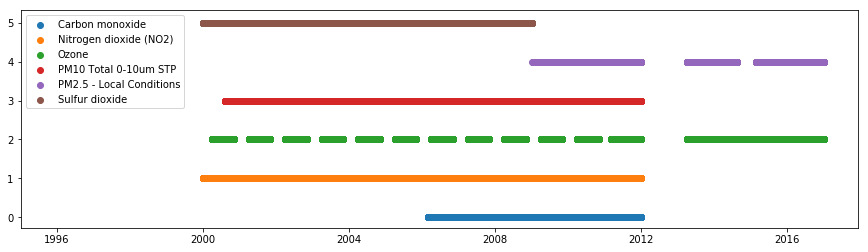

In [10]:
#df[df.parameter==O3].value.plot()
params = list(df.parameter.unique())
params.sort()

ax = plt.figure(figsize=(15,4)).add_subplot(111)

for i, param in enumerate(params):
    data = df[df.parameter == param].index
    ax.scatter(data, [i]*len(data))

ax.set_xlim(left=pd.to_datetime('1/1/1995'))
ax.legend(params);

plt.savefig('data_availability.png',dpi=500)

In [11]:
df.index.min()

Timestamp('2000-01-01 05:00:00')

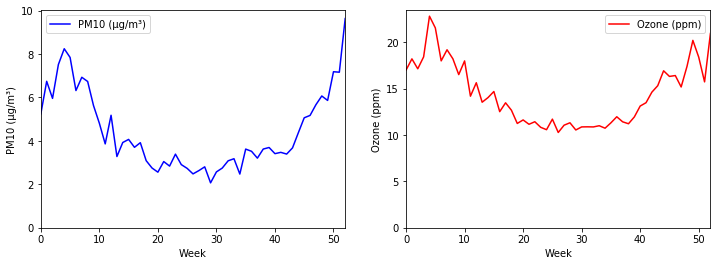

In [17]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time

fig = plt.figure(figsize=(12,4)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122)


annual_mean = df[df.parameter==PM10].groupby('woy').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='upper left')
ax.set_ylabel('PM10 (μg/m³)')
ax.set_ylim(ymin=0)

annual_mean = df[df.parameter==O3].groupby('woy').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'])
ax2.set_ylabel('Ozone (ppm)')
ax2.set_ylim(ymin=0)

ax.set_xlabel('Week')
ax2.set_xlabel('Week')

plt.savefig('annual.png',dpi=1000)

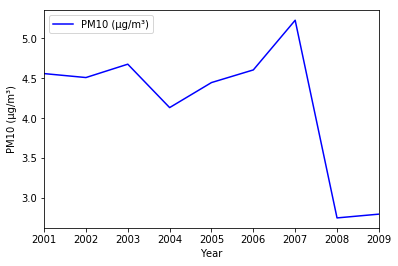

In [18]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.year>=2001) & (df.year<=2011)].groupby('year').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'])
ax.set_ylabel('PM10 (μg/m³)')
# ax.set_ylim(ymin=0)

ax.set_xlabel('Year')

plt.savefig('years.png',dpi=1000)

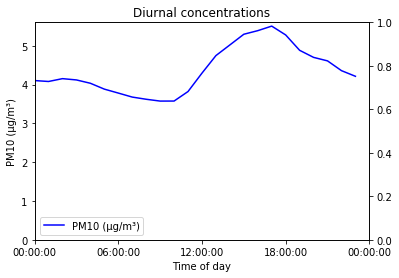

In [14]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

annual_mean = df[df.parameter==PM10].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

# annual_mean = df[df.parameter==O3].groupby('tod').value.mean()
# annual_mean.plot(ax=ax2,color='red')
# ax2.legend(['Ozone (ppm)'],loc='lower right')
# ax2.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)
ax.set_title('Diurnal concentrations')

plt.savefig('daily.png',dpi=1000)

TypeError: Empty 'DataFrame': no numeric data to plot

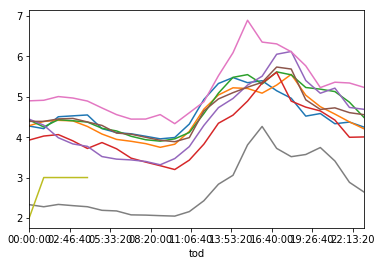

In [15]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

# years = [2001, 2011]
years = list(range(2001,2012,1))

for year in years:
    annual_mean = df[(df.parameter==PM10) & (df.year==year)].groupby('tod').value.mean()
    annual_mean.plot(ax=ax)

ax.legend(years,loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('PM10 concentrations')

plt.savefig('change_pm10.png',dpi=1000)

In [ ]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==O3) & (df.year==2001)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='red')

annual_mean = df[(df.parameter==O3) & (df.year==2011)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='orange')

ax.legend(['2001','2011'])
ax.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Ozone Concentrations')

plt.savefig('change_O3.png',dpi=1000)

In [ ]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year
df['month']=df.index.month

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.month>2) & (df.month<=5)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>5) & (df.month<=8)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>8) & (df.month<=11)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & ((df.month>11) | (df.month<=2))].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

ax.legend(['Spring','Summer','Autumn','Winter'])
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Seasonality of PM10')

plt.savefig('seasonality.png',dpi=1000)

In [ ]:
for p in df.parameter.unique():
    print(p, df[df.parameter==p].unit.unique())

In [ ]:
df.tail()

In [ ]:
df.site.unique()

# Meterology

In [ ]:
meterology = pd.read_csv('raw_data/meterology.csv', parse_dates=['valid'], na_values='M')
meterology.columns = map(lambda s: s.strip(), meterology.columns)
meterology.drop('metar skyc1 skyc2 skyc3 skyc4 skyl1 skyl2 skyl3 skyl4 presentwx'.split(), axis=1, inplace=True)
meterology = meterology[meterology.station=='CXY']
meterology.index = meterology.valid
meterology.sort_index(inplace=True)
# Ignore heading data when wind speed is 0
meterology.loc[meterology.sknt == 0,'drct'] = float('nan')
meterology.head()

In [ ]:
times=meterology.index
times=np.diff(times).astype(int)/10**9
max(times)
plt.hist(times.astype(int),range=(0,3700))
np.percentile(times, 99)

In [ ]:
wd = meterology.drct
ws = meterology.sknt

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 20, 2))
ax.set_legend()
plt.savefig('wind_dir.png')

In [ ]:
wd = df.winddir
ws = meterology.sknt

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 20, 2))
ax.set_legend()
plt.savefig('wind_dir.png')

## Connect Meterology to concentrations

In [16]:
dirs = []
speeds = []
meterology.sort_index(inplace=True)
df.sort_index(inplace=True)
tz_offset = -4 * 3600
for row in df.iterrows():
    t = row[0] + tz_offset
#     print(t)
    index = meterology.index.searchsorted(t)-1
    met = meterology.iloc[index]
    dirs.append(met.drct)
    speeds.append(met.sknt)
#     print(meterology.iloc[index])

df.winddir = dirs
df.sknt = speeds
# print(dirs, speeds)

NameError: name 'meterology' is not defined

In [ ]:
df.head()